In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import pickle
%matplotlib inline


C:\Users\dilip\AppData\Local\Temp\ipykernel_6496\806507949.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
dta =sm.datasets.fair.load_pandas().data

In [3]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
dta['affairs'] = (dta.affairs>0).astype(int)

In [5]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [6]:
dta.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs              int32
dtype: object

In [7]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [8]:
y, X = dmatrices('''affairs ~ rate_marriage + age + yrs_married + children + religious + educ 
                 + C(occupation) + C(occupation_husb)''',dta, return_type="dataframe")

In [9]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [10]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [11]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})


In [12]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [13]:
## Stastistical Analysis

import statsmodels.formula.api as smf
lm = smf.ols(formula='affairs ~ rate_marriage + age + yrs_married + children + religious +educ + occupation + occupation_husb',
             data = dta).fit() ## OLS - Ordinary least squared
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sat, 06 May 2023   Prob (F-statistic):          1.90e-235
Time:                        11:51:04   Log-Likelihood:                -3633.4
No. Observations:                6366   AIC:                             7285.
Df Residuals:                    6357   BIC:                             7346.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2063      0.053     22.692      0.000       1.102       1.310
rate_marriage      -0.1452      0.006    -25.557      0.000      -0.156      -0.134
age                -0.0109      0.002     -5.936      0.000      -0.014      -0.007
yrs_married         0.0207      0.002     10.490      0.000       0.017       0.025
children           -0.0021      0.006     -0.358      0.720      -0.014       0.010
religious          -0.0676      0.006    -10.850      0.000      -0.080      -0.055
educ               -0.0070      0.003     -2.496      0.013      -0.013      -0.002
occupation          0.0298      0.006      4.757      0.000       0.018       0.042
occupation_husb     0.0019      0.004      0.465      0.642      -0.006       0.010
==============================================================================
Omnibus:                     1215.296   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.311
Skew:                           0.612   Prob(JB):                    6.63e-134
Kurtosis:                       2.099   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: >

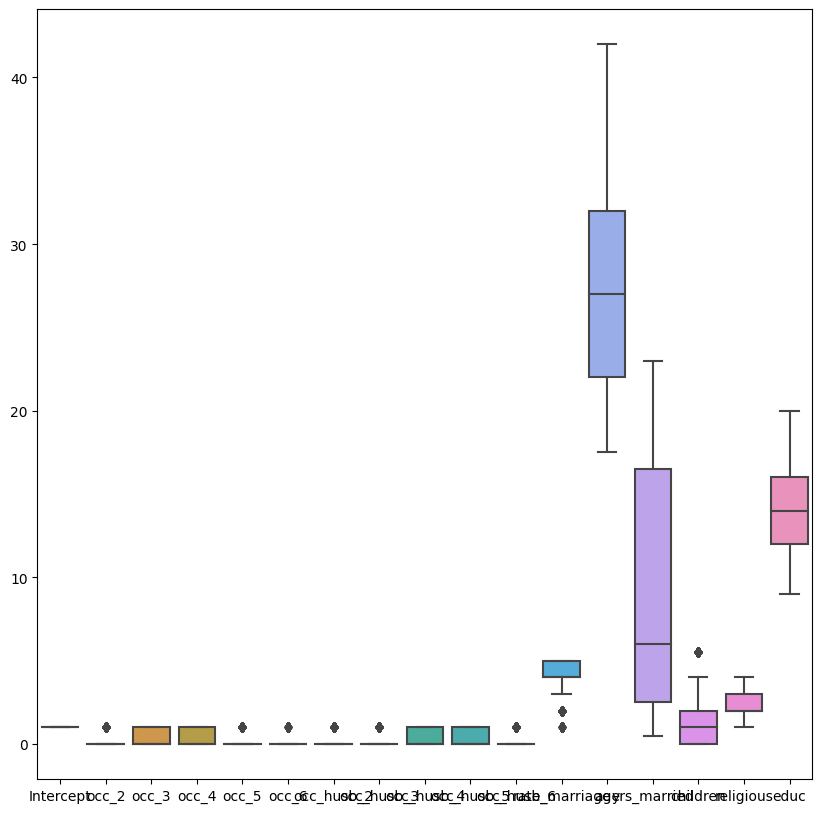

In [14]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = X, ax = ax)

In [15]:
ProfileReport(X).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
dta.duplicated().sum()

In [17]:
dta.drop_duplicates(inplace=True)

In [18]:
X.corr()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occ_2,NaN,1.000000,-0.348075,-0.251243,-0.143237,-0.052128,0.183782,-0.020904,-0.009786,-0.093292,-0.059107,-0.019697,-0.034223,0.004668,0.081182,-0.013129,-0.217719
occ_3,NaN,-0.348075,1.000000,-0.560645,-0.319631,-0.116322,-0.000638,0.090043,0.011248,0.003021,-0.101673,-0.053082,-0.066371,-0.021261,-0.063298,-0.034986,-0.335615
occ_4,NaN,-0.251243,-0.560645,1.000000,-0.230712,-0.083962,-0.083123,-0.043159,0.037341,-0.001946,0.085766,0.068882,0.040982,-0.026816,-0.003235,0.043996,0.477505
occ_5,NaN,-0.143237,-0.319631,-0.230712,1.000000,-0.047868,-0.053426,-0.044053,-0.039932,0.114903,0.006016,-0.002109,0.079533,0.076820,0.033274,0.004260,-0.022121
occ_6,NaN,-0.052128,-0.116322,-0.083962,-0.047868,1.000000,-0.046140,-0.029028,-0.043541,-0.030926,0.218824,0.008878,0.030676,-0.004912,-0.026830,0.011784,0.226920
occ_husb_2,NaN,0.183782,-0.000638,-0.083123,-0.053426,-0.046140,1.000000,-0.146849,-0.347951,-0.316693,-0.153248,-0.038992,-0.057368,-0.033451,0.001190,0.009990,-0.160756
occ_husb_3,NaN,-0.020904,0.090043,-0.043159,-0.044053,-0.029028,-0.146849,1.000000,-0.197588,-0.179838,-0.087024,-0.022514,0.011610,0.008046,-0.005538,0.008170,-0.052723
occ_husb_4,NaN,-0.009786,0.011248,0.037341,-0.039932,-0.043541,-0.347951,-0.197588,1.000000,-0.426115,-0.206198,0.003303,-0.048989,-0.031121,-0.008032,-0.008491,-0.031422
occ_husb_5,NaN,-0.093292,0.003021,-0.001946,0.114903,-0.030926,-0.316693,-0.179838,-0.426115,1.000000,-0.187674,0.003256,0.105525,0.092462,0.053965,-0.000063,0.042540


In [19]:
# Age and yrs_married have high correlation and one of them can be dropped

In [20]:
X = X.drop(columns=['Intercept', 'age'])

In [21]:
scalar = StandardScaler()
X_scalar = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)

<AxesSubplot: >

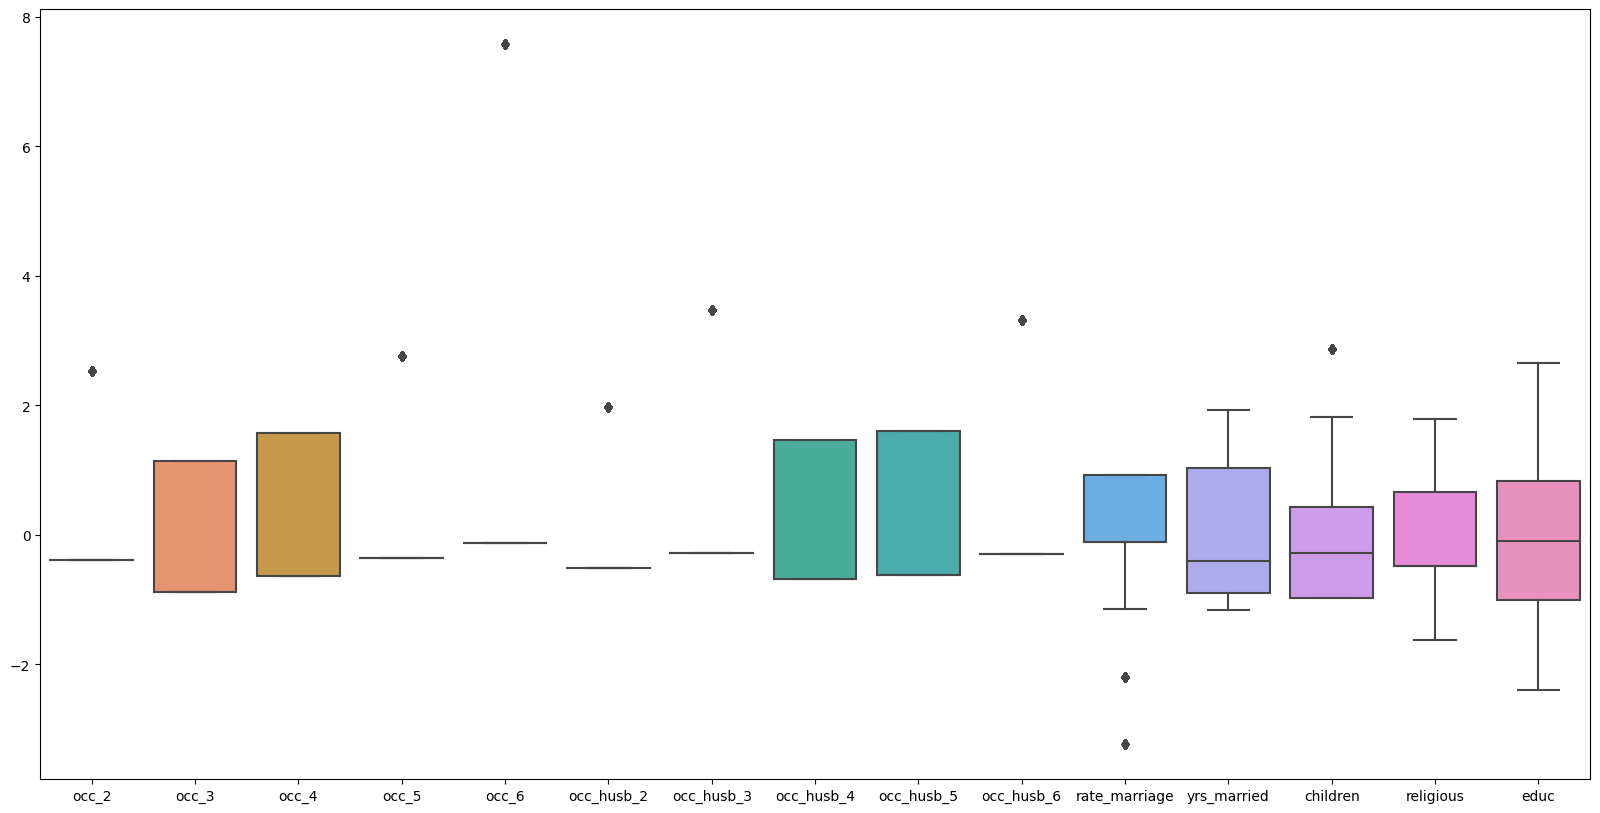

In [22]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = X_scalar, ax = ax)

In [23]:
## Splitting Data
X_train,X_test, Y_train,Y_test = train_test_split(X_scalar, y, test_size=.20, random_state=144)

In [24]:
## Saving the scaling model
standardize = scalar.fit(X)
pickle.dump(standardize,open('scale_model.pickle','wb'))

# Logistic Regression Model Creation¶

In [25]:
logr_liblinear = LogisticRegression(verbose=1, solver='liblinear')


In [26]:
logr_liblinear.fit(X_train,Y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [27]:
logr_liblinear.predict([X_test.iloc[0]])

C:\Users\dilip\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [28]:
y_pred = logr_liblinear.predict(X_test)

In [29]:
confusion_matrix(Y_test,y_pred)

array([[751,  87],
       [286, 150]], dtype=int64)

In [30]:
def model_eval(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    specificity = tn/(fp+tn)
    F1_score = 2*recall*precision/(recall+precision)
    
    result = {   "Accuracy": accuracy,
                 "Precision": precision,
                 "Recall": recall,
                 "Specificity": specificity,
                 "F1 Score": F1_score}
    return result

In [31]:
model_eval(Y_test,y_pred)

{'Accuracy': 0.707221350078493,
 'Precision': 0.6329113924050633,
 'Recall': 0.3440366972477064,
 'Specificity': 0.89618138424821,
 'F1 Score': 0.4457652303120357}

In [32]:
auc = roc_auc_score(Y_test,y_pred)
auc

0.6201090407479583

In [33]:
## Saving the logistic regression model
pickle.dump(logr_liblinear,open('logReg_model.pickle','wb'))